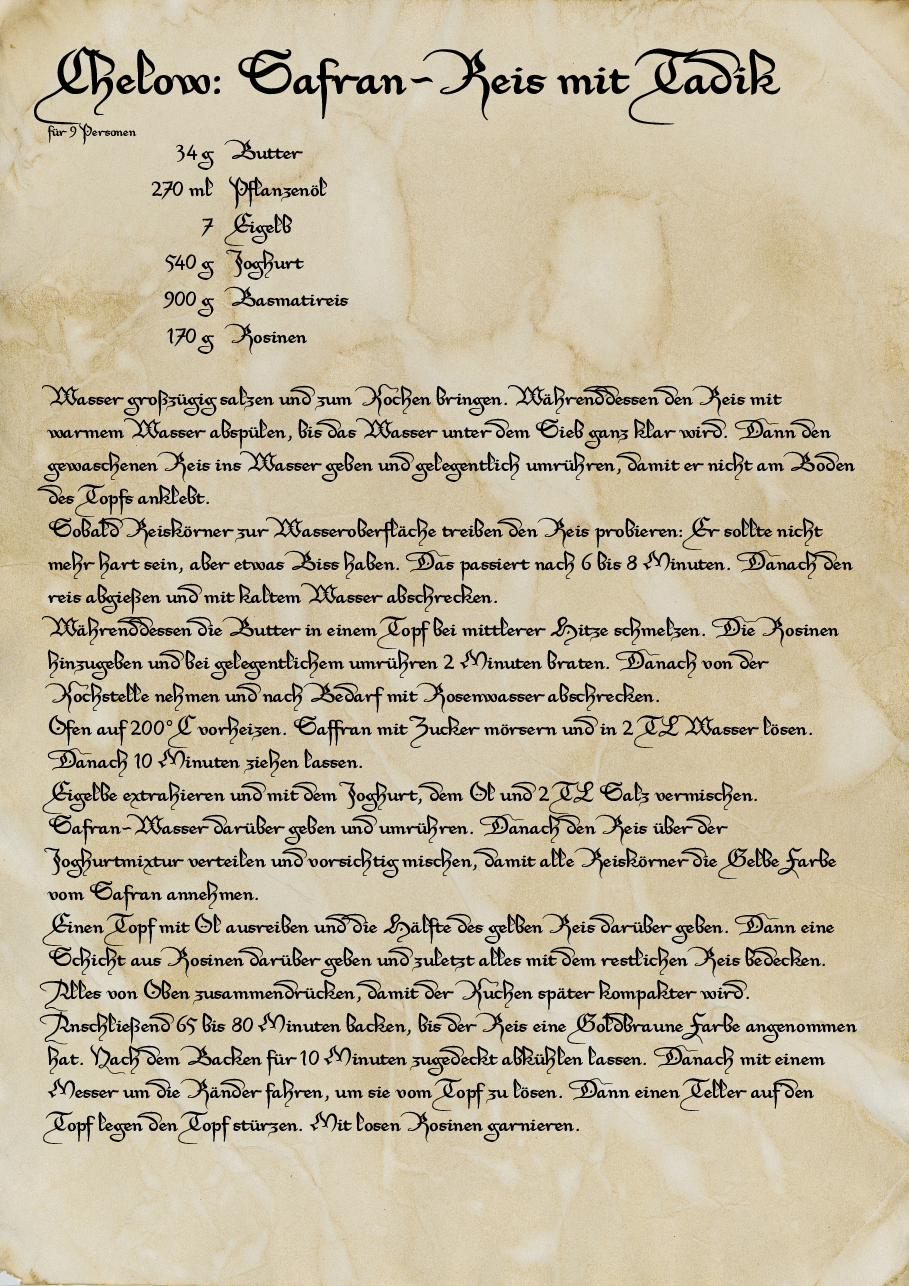

In [14]:
import fpdf
from fpdf import FPDF
from wand.image import Image as WImage
import json

with open("recipes.json", 'r') as json_file:
    recipes = json.load(json_file)

pdf = FPDF(orientation='P', unit='mm', format='A4')
fpdf.SYSTEM_TTFONTS = '~/.local/share/fonts/'
pdf.add_font('Xirwena', '', 'xirwen3U.ttf', uni=True)
for recipe in recipes:
    pdf.add_page()
    pdf.image("texture-of-parchment-paper.jpg", x=-4, y=-8, w=217, h=313)
    pdf.set_font('Xirwena', size=28)
    pdf.cell(0, pdf.font_size * 1.8, txt=recipe["title"], ln=1, align="L")
    pdf.set_font('Xirwena', size=8)
    pdf.cell(0, pdf.font_size * 2, txt=recipe["servings"], ln=1, align="L")
    pdf.set_font('Xirwena', size=12)
    for ingredient in recipe["ingredients"]:
        pdf.cell(40, pdf.font_size * 1.0,
                     txt=ingredient[0], ln=0, align="R")
        pdf.cell(2, 0, txt="", ln=0, align="R")
        pdf.cell(0, pdf.font_size * 1.0,
                     txt=ingredient[1], ln=1, align="L")
        pdf.ln()
    pdf.ln()
    for line in recipe["description"]:
        pdf.write(h=pdf.font_size * 1.8, txt=line)
        pdf.ln()
pdf.output("test.pdf")

WImage(filename="test.pdf[2]", resolution=110)